# **Libraries**

In [48]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [16]:
df = pd.read_csv("/content/sample_data/GAS_dropna.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-21,30833.333984,34250.000000,30833.333984,34166.667969,32736.435547,3002495.0
1,2012-05-22,35833.332031,35833.332031,35416.667969,35833.332031,34333.332031,5801459.0
2,2012-05-23,35750.000000,35833.332031,34083.332031,34083.332031,32656.587891,1266935.0
3,2012-05-24,32500.000000,33333.332031,32416.666016,32416.666016,31059.689453,1211255.0
4,2012-05-25,32416.666016,33166.667969,30916.666016,32500.000000,31139.535156,1112711.0
...,...,...,...,...,...,...,...
2990,2024-05-20,76100.000000,76800.000000,76000.000000,76000.000000,76000.000000,1110709.0
2991,2024-05-21,76200.000000,77600.000000,76000.000000,76700.000000,76700.000000,1696938.0
2992,2024-05-22,77300.000000,77300.000000,76500.000000,76600.000000,76600.000000,832369.0
2993,2024-05-23,76600.000000,79900.000000,76400.000000,79900.000000,79900.000000,4014800.0


In [20]:
X_df = df.drop(columns=["Close"])
y_df = df["Close"]

In [21]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

In [22]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)
X_train_df[0:10]

,Date,Open,High,Low,Adj Close,Volume
0,2012-05-21,30833.333984,34250.000000,30833.333984,32736.435547,3002495.0
1,2012-05-22,35833.332031,35833.332031,35416.667969,34333.332031,5801459.0
2,2012-05-23,35750.000000,35833.332031,34083.332031,32656.587891,1266935.0
3,2012-05-24,32500.000000,33333.332031,32416.666016,31059.689453,1211255.0
4,2012-05-25,32416.666016,33166.667969,30916.666016,31139.535156,1112711.0
5,2012-05-28,32666.666016,32666.666016,31250.000000,30021.707031,548879.0
6,2012-05-29,30250.000000,30833.333984,30083.333984,29303.101563,501959.0
7,2012-05-30,30833.333984,31583.333984,30583.333984,30181.394531,204335.0
8,2012-05-31,31000.000000,31500.000000,30583.333984,29702.326172,322835.0
9,2012-06-01,30833.333984,31166.666016,30833.333984,29702.326172,166043.0


In [23]:
X_train_df.shape,X_val_df.shape,X_test_df.shape

((2096, 6), (449, 6), (450, 6))

In [24]:
X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day

# **Parameters Tunning**

In [27]:
score = 0
for n_estimators in [50,75,100,125,150,175]:
  for learning_rate in [0.01,0.03,0.05,0.07,0.08,0.09,0.1,0.15,0.2,0.3,0.4,0.5,1]:
    for random_state in range(0,1):
 # for each combination of parameters, train an adaboost
      model = AdaBoostRegressor(n_estimators=n_estimators,learning_rate=learning_rate,random_state=random_state)
      model.fit(X_train_df.drop('Date', axis=1)[:-1], y_train_df[1:])
 # evaluate the Adaboost on the test set
      y_val_pred = model.predict(X_val_df.drop('Date', axis=1))[:-1].reshape(-1,1)
      y_val_df = y_val_df.ravel()
      y_val_pred = y_val_pred.ravel()
 # if we got a better score, store the score and parameters
      if  r2_score(y_val_df[1:], y_val_pred)> score:
        score = r2_score(y_val_df[1:], y_val_pred)
        best_parameters = {'n_estimators': n_estimators, 'learning_rate':learning_rate,'random_state':random_state}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.96
Best parameters: {'n_estimators': 150, 'learning_rate': 0.1, 'random_state': 0}


In [29]:
model=AdaBoostRegressor(estimator=None, n_estimators=150, learning_rate=0.1,loss='linear', base_estimator='deprecated',random_state=0)

In [30]:
X_new_train_df, X_test_df, y_new_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)

In [31]:
model.fit(X_new_train_df.drop('Date', axis=1)[:-1], y_new_train_df[1:])

AdaBoostRegressor(learning_rate=0.1, n_estimators=150, random_state=0)

In [32]:
y_new_train_pred = model.predict(X_new_train_df.drop('Date', axis=1)[:-1])
y_new_train_pred[:20]

array([33333.02125024, 34056.12241576, 33153.62593178, 32297.07108886,
       32245.23812317, 32158.45649249, 32158.45649249, 32158.45649249,
       32158.45649249, 32158.45649249, 32158.45649249, 32158.45649249,
       32158.45649249, 32158.45649249, 32158.45649249, 32158.45649249,
       32158.45649249, 32158.45649249, 32158.45649249, 32158.45649249])

In [33]:
y_new_train_df = y_new_train_df.ravel()
y_new_train_pred = y_new_train_pred.ravel()

# **Train Results**

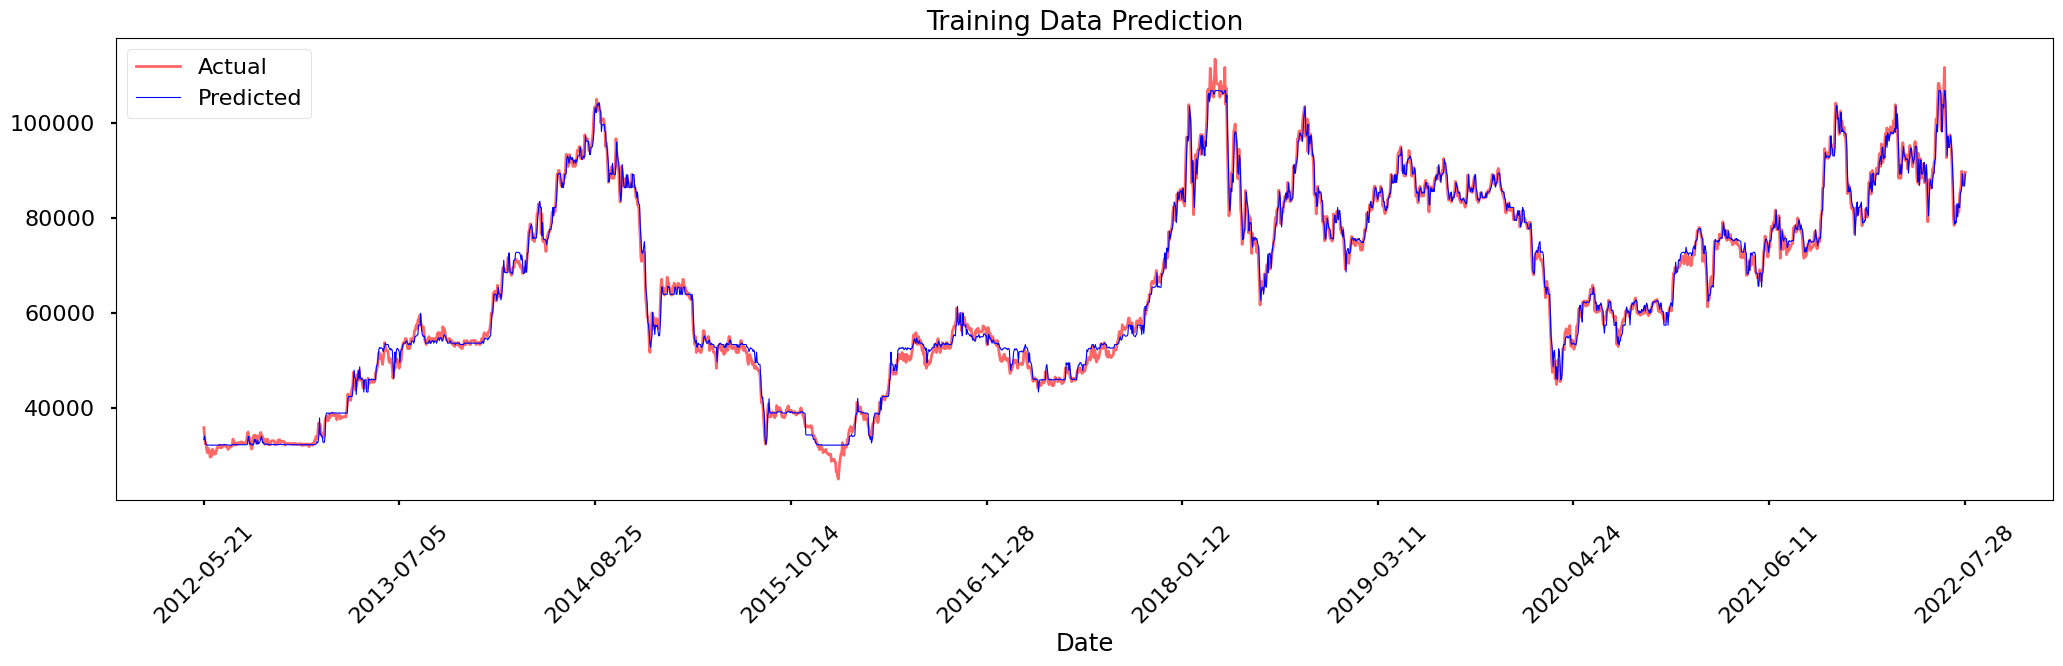

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of visible x-axis tick labels
num_ticks = 10  # Adjust the number of ticks as needed

plt.figure(figsize=(25, 6))
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_df[1:], color='red', linewidth=2.0, alpha=0.6)
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.title("Training Data Prediction")

# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[1:len(y_new_train_df)])-1, num_ticks, dtype=int)
plt.xticks(x_ticks, df.Date[x_ticks], rotation=45)  # Adjust rotation angle as needed

plt.show()


In [41]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1)[:-1])
y_test_pred[0:10]

array([89343.77396345, 89417.41574824, 92392.89225678, 91480.31516098,
       91680.55579702, 92259.43825572, 93026.40043939, 92693.2584976 ,
       93051.56009239, 94837.0814529 ])

In [42]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [43]:
len(y_test_df)

450

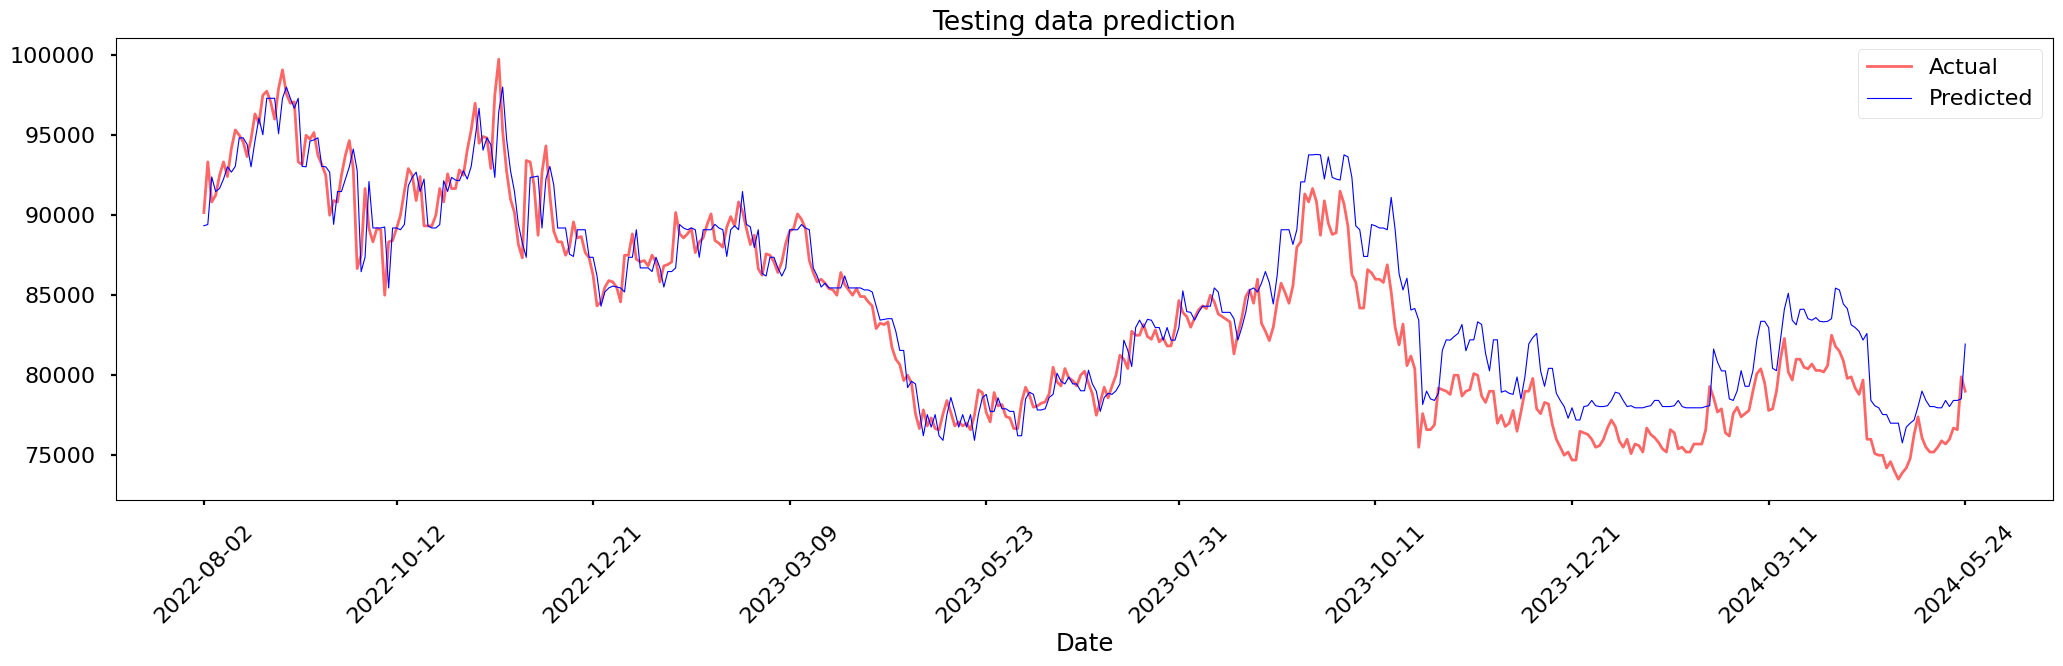

In [45]:
num_ticks = 10  # Adjust the number of ticks as needed
plt.figure(figsize=(25,6))
plt.plot(df.Date[len(y_train_df)+len(y_val_df)+1:], y_test_df[1:], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df.Date[len(y_train_df)+len(y_val_df)+1:], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[len(y_train_df)+len(y_val_df)+1:])-1, num_ticks, dtype=int)
plt.xticks(x_ticks, df.Date[len(y_train_df)+len(y_val_df)+1+x_ticks], rotation=45)  # Adjust rotation angle as needed
plt.show()

In [46]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

# Model **Evaluation**

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_new_train_df[1:],y_new_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_new_train_df[1:],y_new_train_pred))
print("R2 score:", r2_score(y_new_train_df[1:],y_new_train_pred))
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df[1:],y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df[1:],y_test_pred))
print("R2 score:", r2_score(y_test_df[1:],y_test_pred))


Test accuracy for train set
Root Mean Square Error (RMSE): 1767.4718100949988
 Mean Absolute Percentage Error (MAPE): 0.021397846110885785
R2 score: 0.9923569200528106
Test accuracy for test set
Root Mean Square Error (RMSE): 2191.7187740703266
 Mean Absolute Percentage Error (MAPE): 0.020859812772825663
R2 score: 0.8792508461132016
